In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scf.qelattice import get_qel
from constants.constants import get_silicon_all_scf_data_sd

In [2]:
dirs = get_silicon_all_scf_data_sd()

In [3]:
len(dirs)

96461

In [11]:
threshold = 0.05

available_dirs = []
for d in dirs:
    try:
        qel = get_qel(d)
        force = qel.get_force()
        if (np.abs(force) > threshold).all():
            available_dirs.append(d)
    except:
        continue

print(f'number of data: {len(available_dirs)}')

## Plot energy distribution

In [ ]:
import random

energy_result = []
for path in random.sample(available_dirs, 5000):
    qel = get_qel(path)
    energy_result.append([float(qel.get_energy()), qel.structure_id, int(qel.num_atom), float(qel.get_vol()), path])

In [ ]:
result_df = pd.DataFrame(data=energy_result, columns=['energy', 'mpid', 'n_atom', 'vol', 'path'])
result_df['atom_energy'] = result_df['energy'] / result_df['n_atom']
result_df['atom_vol'] = result_df['vol'] / result_df['n_atom']

<AxesSubplot: xlabel='atom_vol', ylabel='atom_energy'>

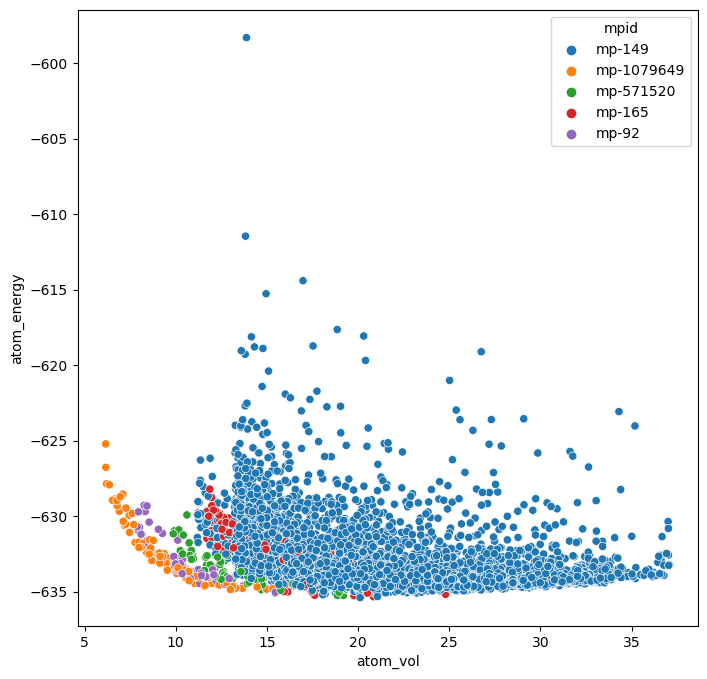

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
# ax.set_ylim(-636, -630)

sns.scatterplot(data=result_df, x='atom_vol', y='atom_energy', ax=ax, hue='mpid')

In [ ]:
force_df_list = []

for d in random.sample(available_dirs, 5000):
    try:
        qel = get_qel(d)
        force_df_each = pd.DataFrame(data=qel.get_force(), columns=['fx', 'fy', 'fz'])
        force_df_each['mpid'] = qel.structure_id
        force_df_list.append(force_df_each.copy())
    except:
        continue

In [ ]:
force_df = pd.concat(force_df_list)

<AxesSubplot: xlabel='fx', ylabel='fz'>

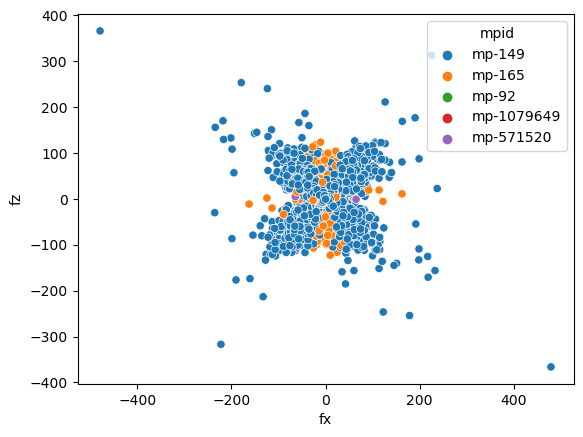

In [ ]:
sns.scatterplot(data=force_df, x='fx', y='fz', hue='mpid')

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 7.0000e+00, 4.0000e+00,
        7.0000e+00, 4.2000e+01, 1.9200e+02, 9.3100e+02, 2.6481e+04,
        2.6247e+04, 9.4100e+02, 1.8500e+02, 4.4000e+01, 5.0000e+00,
        5.0000e+00, 6.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-4.79553008e+02, -4.47581208e+02, -4.15609408e+02, -3.83637608e+02,
        -3.51665808e+02, -3.19694008e+02, -2.87722208e+02, -2.55750408e+02,
        -2.23778608e+02, -1.91806808e+02, -1.59835009e+02, -1.27863209e+02,
        -9.58914088e+01, -6.39196089e+01, -3.19478090e+01,  2.39909500e-02,
         3.19957909e+01,  6.39675908e+01,  9.59393907e+01,  1.27911191e+02,
         1.59882990e+02,  1.91854790e+02,  2.23826590e+02,  2.55798390e+02,
         2.87770190e+02,  3.19741990e+02,  3.51713790e+02,  3.83685590e+02,
         4.15657390e+02,  4.47629190e+02,  4.79600990e+02]

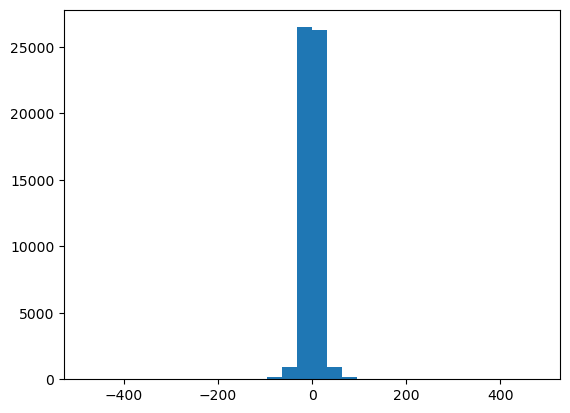

In [ ]:
plt.hist(force_df['fx'], bins=30)

In [4]:
len(dirs)

96461

In [5]:
dirs = [i for i in dirs if 'dimer' in i]

In [6]:
def validate_qel(path):
    try:
        qel = get_qel(path)
        return True
    except:
        return False

print(len(dirs))
all_dirs = list(filter(lambda path: validate_qel(path), dirs))
print(len(all_dirs))


95
61


In [7]:
from create_input.sample_structure import filter_structures_by_interatomic_distance

# available_dirs = dirs

sampled_available_dirs = filter_structures_by_interatomic_distance(rcut=1.6, all_dirs=all_dirs)

In [8]:
print(len(all_dirs)), print(len(sampled_available_dirs))

61
38


(None, None)

In [9]:
sampled_available_dirs

array(['/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_33',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_60',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_58',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_67',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_51',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_56',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_35',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_57',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_50',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_59',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_66',
       '/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord

In [7]:
import os

path2save = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/87/data'
with open(os.path.join(path2save, 'dirs.txt'), mode='w') as f:
    f.write('\n'.join(sampled_available_dirs))

In [10]:
for i in sampled_available_dirs:
    print(i)

/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_33
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_60
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_58
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_67
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_51
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_56
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_35
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_57
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_50
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_59
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_66
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_61
/Users/y1u0d2/desktop/Lab/result/qe/Si/mp-149_dimer/coord/01/result/scf_43
/Users/y1u0d2/desktop/Lab